In [1]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

#import machine learning
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC as svm

from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score, roc_auc_score #metrics
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
from sklearn.preprocessing import minmax_scale

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [3]:
import category_encoders as ce

In [4]:
# https://www.kaggle.com/kemical/kickstarter-projects

# Columns
# ID - internal kickstarter id
# name - name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
# category - category
# main_category - category of campaign
# currency - currency used to support
# deadline - deadline for crowdfunding
# goal - fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
# launched - date launched
# pledged - amount pledged by "crowd"
# state - Current condition the project is in
# backers - number of backers
# country - country pledged from
# usd pledged - amount of money pledged
# Goal amount in USD

In [5]:
train = pd.read_csv("ks-projects-201801.csv")
train.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
train.shape

(378661, 15)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [8]:
train.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [9]:
# видаляємо колонки:
# 'ID', 'name' - не інформативні
# 'currency', 'goal', 'pledged' - є теж саме тільки приведене до долара, немає сенсу залишати дублі
# 'usd pledged' - і пропущені значення, і дублюється

In [10]:
train = train.drop(['ID', 'name', 'currency', 'goal', 'pledged', 'usd pledged'], axis=1)

In [11]:
# перетворюємо колонки: спочатку state

In [12]:
train.groupby(['state']).size()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
dtype: int64

In [13]:
train = train[train.state != "live"]
train = train[train.state != "canceled"] 
train = train[train.state != "suspended"] 
# deletting other states

In [14]:
train['target'] = np.where(train.state == 'successful', 1, 0) #denotes whether campaign was sucessful or not

In [15]:
train = train.drop(['state'], axis=1)

In [16]:
train.head()

,category,main_category,deadline,launched,backers,country,usd_pledged_real,usd_goal_real,target
0,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,0,GB,0.0,1533.95,0
1,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,15,US,2421.0,30000.00,0
2,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,3,US,220.0,45000.00,0
3,Music,Music,2012-04-16,2012-03-17 03:24:11,1,US,1.0,5000.00,0
5,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,224,US,52375.0,50000.00,1


In [17]:
train.describe()

,backers,usd_pledged_real,usd_goal_real,target
count,335237.000000,3.352370e+05,3.352370e+05,335237.000000
mean,115.144990,9.861321e+03,4.111254e+04,0.399586
std,960.358704,9.622133e+04,1.103029e+06,0.489814
min,0.000000,0.000000e+00,1.000000e-02,0.000000
25%,2.000000,4.966000e+01,2.000000e+03,0.000000
50%,14.000000,7.860000e+02,5.000000e+03,0.000000
75%,62.000000,4.596000e+03,1.500000e+04,1.000000
max,219382.000000,2.033899e+07,1.663614e+08,1.000000


In [18]:
# перетворюємо колонки: далі deadline, launched 

In [19]:
train.deadline = pd.to_datetime(train.deadline, errors = 'coerce', format="%Y/%m/%d").dt.date
train.launched = pd.to_datetime(train.launched, errors = 'coerce', format="%Y/%m/%d").dt.date 

In [20]:
train['duration_days'] = (train['deadline'] - train['launched']).dt.days

In [21]:
train['duration_days'].describe()

count    335237.000000
mean         33.943422
std          12.701655
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: duration_days, dtype: float64

In [22]:
train['launch_month']=pd.to_datetime(train['launched'], format="%Y/%m/%d").dt.month 
train['launch_day']=pd.to_datetime(train['launched'], format="%Y/%m/%d").dt.dayofweek

In [23]:
train = train.drop(['deadline', 'launched'], axis=1)

In [24]:
train.head()

,category,main_category,backers,country,usd_pledged_real,usd_goal_real,target,duration_days,launch_month,launch_day
0,Poetry,Publishing,0,GB,0.0,1533.95,0,59,8,1
1,Narrative Film,Film & Video,15,US,2421.0,30000.00,0,60,9,5
2,Narrative Film,Film & Video,3,US,220.0,45000.00,0,45,1,5
3,Music,Music,1,US,1.0,5000.00,0,30,3,5
5,Restaurants,Food,224,US,52375.0,50000.00,1,35,2,4


In [25]:
# перетворюємо колонки: country

In [26]:
train.groupby(['country']).size()

country
AT         485
AU        6616
BE         523
CA       12370
CH         652
DE        3436
DK         926
ES        1873
FR        2520
GB       29454
HK         477
IE         683
IT        2369
JP          23
LU          57
MX        1411
N,0"      3772
NL        2411
NO         582
NZ        1274
SE        1509
SG         454
US      261360
dtype: int64

In [27]:
train = train[train.country != "N,0"]

In [28]:
# перезапишемо країну таргет.енкодером

X3 = train.country
y3 = train.usd_pledged_real

# Target with default parameters
ce_m_country = ce.TargetEncoder(cols = ['country'])

ce_m_country.fit(X3, y3)
# Must pass the series for y in v1.2.8

train['country'] = ce_m_country.transform(X3, y3)

In [29]:
train.head()

,category,main_category,backers,country,usd_pledged_real,usd_goal_real,target,duration_days,launch_month,launch_day
0,Poetry,Publishing,0,7675.499687,0.0,1533.95,0,59,8,1
1,Narrative Film,Film & Video,15,10481.959690,2421.0,30000.00,0,60,9,5
2,Narrative Film,Film & Video,3,10481.959690,220.0,45000.00,0,45,1,5
3,Music,Music,1,10481.959690,1.0,5000.00,0,30,3,5
5,Restaurants,Food,224,10481.959690,52375.0,50000.00,1,35,2,4


In [30]:
train.groupby(['country']).size()

country
1557.562955       1411
2956.130854       3772
3687.435654         23
4206.025928        582
5776.634700        683
5856.771309       2369
5936.442943       1274
6261.774175       1873
6512.737737       6616
6943.614954      12370
7675.499687      29454
7706.200011        926
7807.062753        523
7922.553158         57
8187.783930       1509
10481.959690    261360
10823.086895      3436
11592.476982       454
11719.610369      2411
13028.682837      2520
18870.281381       485
19004.918727       652
19200.584109       477
dtype: int64

In [31]:
X_3 = train.main_category
y_3 = train.backers	

# Target with default parameters
ce_m_category = ce.TargetEncoder(cols = ['main_category'])

ce_m_category.fit(X_3, y_3)
# Must pass the series for y in v1.2.8

train['main_category'] = ce_m_category.transform(X_3, y_3)

In [32]:
train.groupby(['main_category']).size()

main_category
29.851113      7818
43.057845      4149
43.225490      9690
44.777840      3574
45.422448     25641
49.153959     10243
55.466845     48183
58.954158     22054
60.971120     35907
68.438871     19778
71.474443     57381
145.608322     9878
186.126308    27053
274.120082    25366
382.090281    28522
dtype: int64

In [33]:
X_3 = train.main_category
y_3 = train.backers	

# Target with default parameters
ce_m_category = ce.TargetEncoder(cols = ['main_category'])

ce_m_category.fit(X_3, y_3)
# Must pass the series for y in v1.2.8

train['main_category'] = ce_m_category.transform(X_3, y_3)

In [34]:
train = train[train.backers != 0]

train['avg_check'] = (train['usd_goal_real'] / train['backers'])

X13 = train.category
y13 = train.avg_check

# Target with default parameters
ce_category = ce.TargetEncoder(cols = ['category'])

ce_category.fit(X13, y13)
# Must pass the series for y in v1.2.8

train['category'] = ce_category.transform(X13, y13)

train.head()

,category,main_category,backers,country,usd_pledged_real,usd_goal_real,target,duration_days,launch_month,launch_day,avg_check
1,11347.755846,71.474443,15,10481.95969,2421.0,30000.0,0,60,9,5,2000.000000
2,11347.755846,71.474443,3,10481.95969,220.0,45000.0,0,45,1,5,15000.000000
3,5527.619057,55.466845,1,10481.95969,1.0,5000.0,0,30,3,5,5000.000000
5,28880.375025,58.954158,224,10481.95969,52375.0,50000.0,1,35,2,4,223.214286
6,6340.031483,58.954158,16,10481.95969,1205.0,1000.0,1,20,12,0,62.500000


In [35]:
train.groupby(['category']).size()

category
373.599259         32
451.009647        710
519.374082       2696
694.387086       5037
700.366843         43
                 ... 
194747.138448     660
261633.087335     463
446443.176404     265
448903.238967     273
900408.262639     148
Length: 159, dtype: int64

In [36]:
train.shape # датасет втратив за весь час препроцесінгу 85 833 семплів біля 22 %

(292828, 11)

In [37]:
train.groupby(['target']).size()

target
0    158977
1    133851
dtype: int64

In [38]:
train = train.drop(['backers', 'usd_pledged_real', 'avg_check'], axis=1)

In [39]:
train.head()

,category,main_category,country,usd_goal_real,target,duration_days,launch_month,launch_day
1,11347.755846,71.474443,10481.95969,30000.0,0,60,9,5
2,11347.755846,71.474443,10481.95969,45000.0,0,45,1,5
3,5527.619057,55.466845,10481.95969,5000.0,0,30,3,5
5,28880.375025,58.954158,10481.95969,50000.0,1,35,2,4
6,6340.031483,58.954158,10481.95969,1000.0,1,20,12,0


In [40]:
# зробити фіча.імпотенс - ?

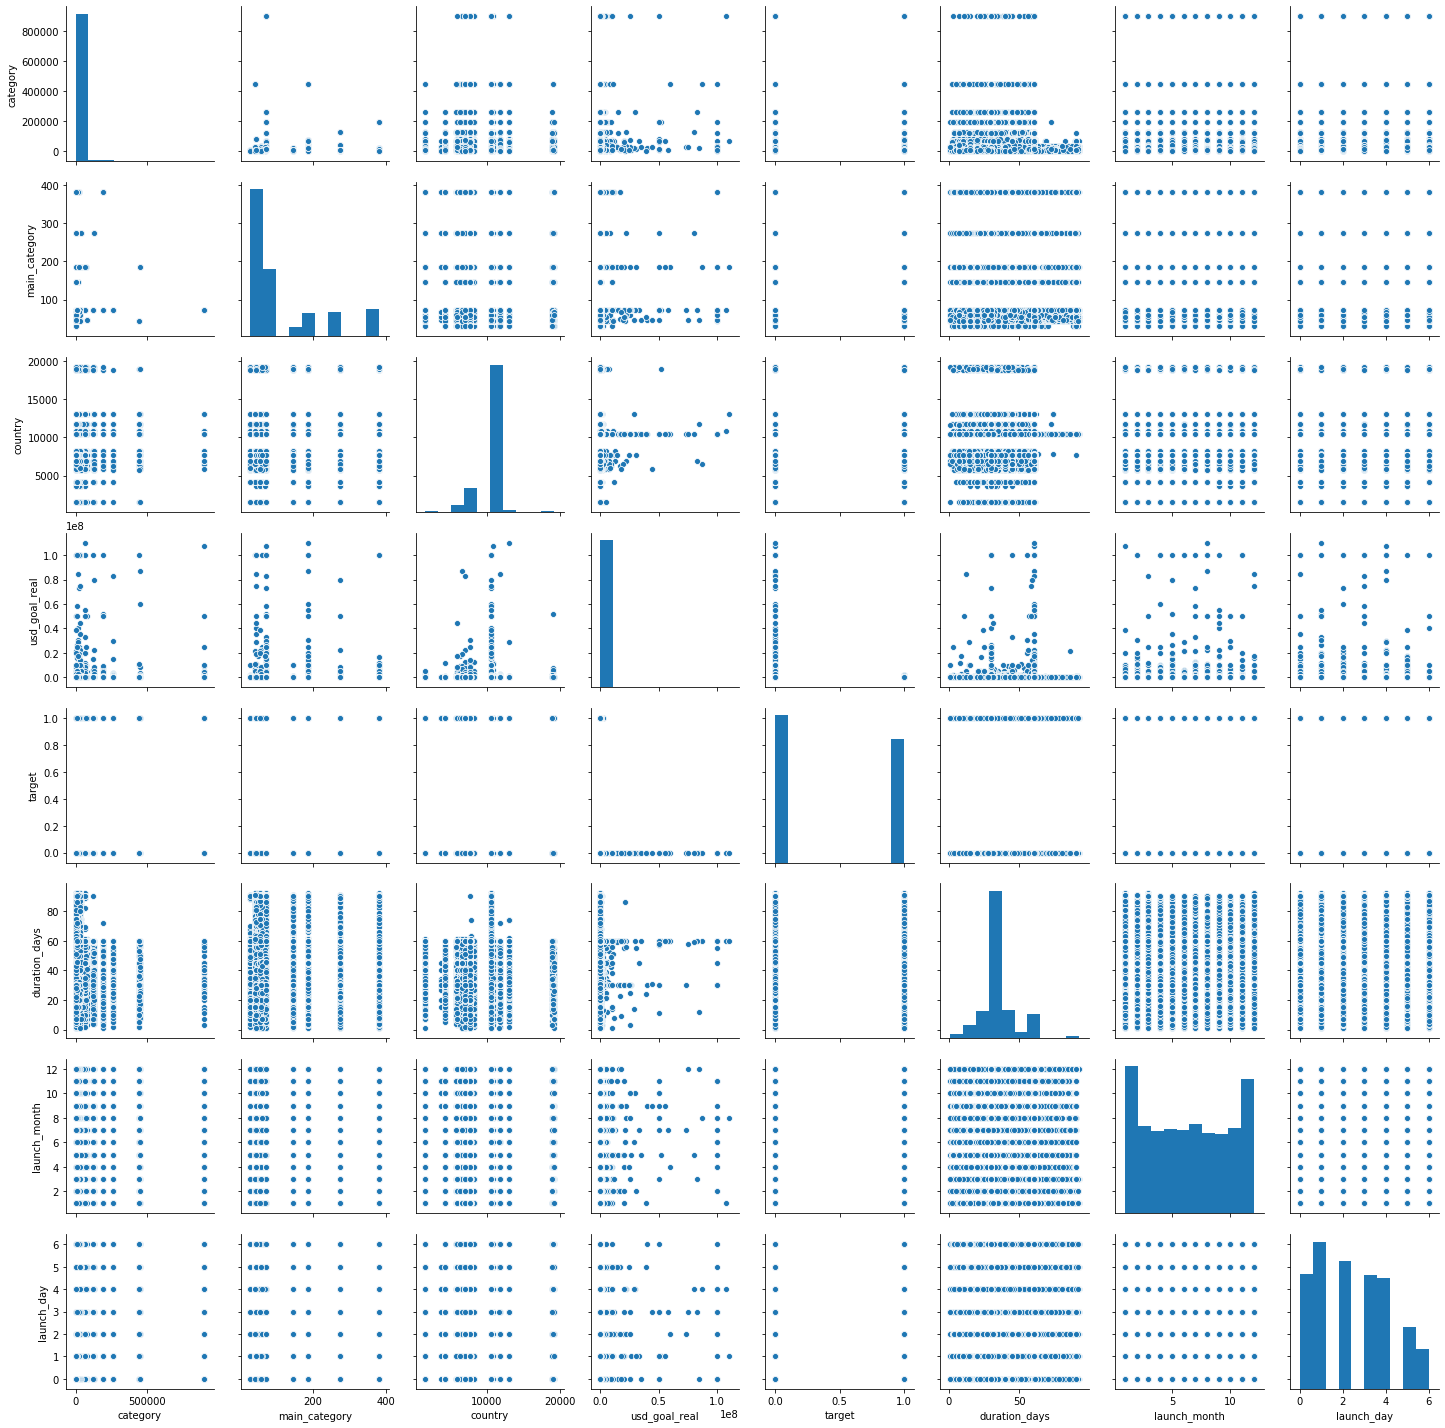

In [41]:
sns.pairplot(train)

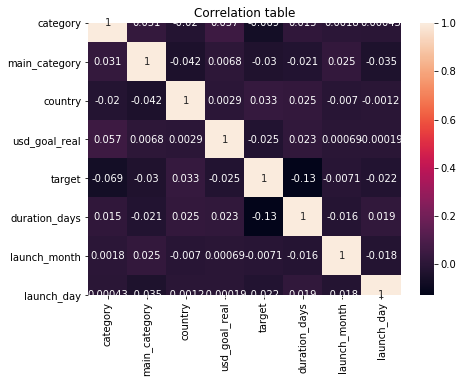

In [42]:
correlation = train.corr()

plt.figure(figsize=(7,5))
plt.title('Correlation table')

sns.heatmap(correlation, annot=True)
plt.show()

In [43]:
# StandardScaler(train) - чи ж він є в пайплайні то і ненада?

In [44]:
X = train.drop(['target'], axis = 1)
y = train['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [47]:
model_LR = LogisticRegressionCV(Cs=2, random_state=42)
model_LR.fit(X_train, y_train)

LogisticRegressionCV(Cs=2, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=42, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [48]:
y_pred_LR = model_LR.predict(X_test)
y_pred_LR

array([0, 0, 1, ..., 1, 0, 1])

In [49]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63     79584
           1       0.56      0.54      0.55     66830

    accuracy                           0.60    146414
   macro avg       0.59      0.59      0.59    146414
weighted avg       0.60      0.60      0.60    146414



In [50]:
CM = confusion_matrix(y_test, y_pred_LR)
CM

array([[51166, 28418],
       [30487, 36343]], dtype=int64)

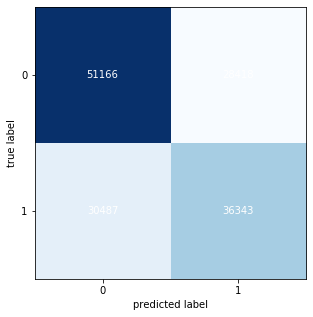

In [51]:
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))

In [53]:
probability = model_LR.predict_proba(X_test)
probability

array([[0.9588015 , 0.0411985 ],
       [0.52815938, 0.47184062],
       [0.48440102, 0.51559898],
       ...,
       [0.4744033 , 0.5255967 ],
       [0.51654958, 0.48345042],
       [0.47668123, 0.52331877]])

              precision    recall  f1-score   support

           0       0.63      0.64      0.63     79393
           1       0.56      0.55      0.55     67021

    accuracy                           0.60    146414
   macro avg       0.59      0.59      0.59    146414
weighted avg       0.60      0.60      0.60    146414

[[50915 28478]
 [30432 36589]]


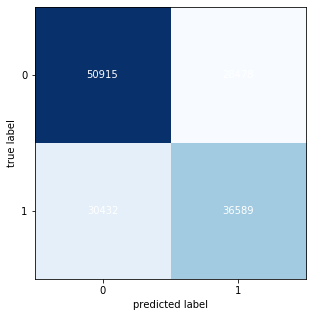

In [56]:
y_pred_1 = model_LR.predict(X_valid)

probability = model_LR.predict_proba(X_valid)

print(classification_report(y_valid, y_pred_1))

CM = confusion_matrix(y_valid, y_pred_1)
print(CM)

fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(5, 5))

LogReg: 0.545792 (+/- 0.003196)
XGBClassifier: 0.615878 (+/- 0.001454)
DecisionTreeClassifier: 0.538166 (+/- 0.003458)
RandomForestClassifier: 0.588656 (+/- 0.002499)
GradientBoostingClassifier: 0.595145 (+/- 0.002028)
RidgeClassifier: 0.326910 (+/- 0.002415)
BaggingRidgeClassifier: 0.525907 (+/- 0.002237)
ExtraTreesClassifier: 0.510581 (+/- 0.003302)


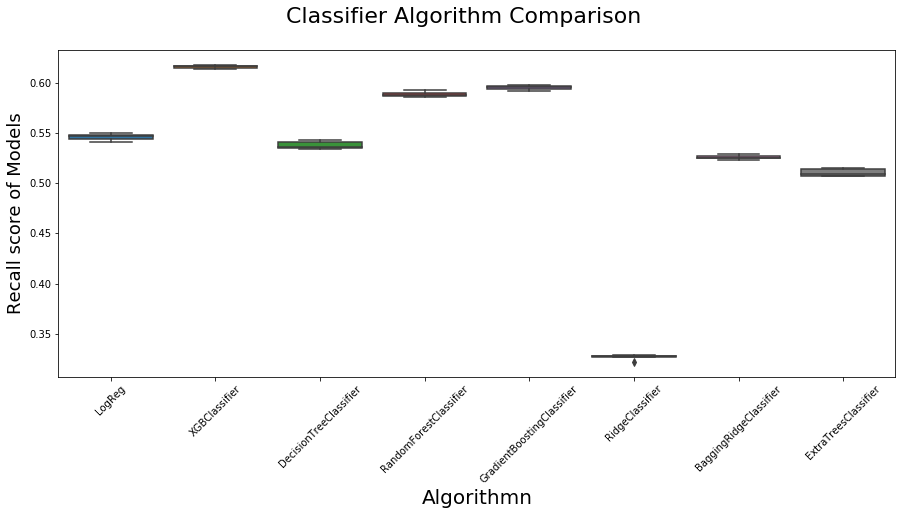

In [57]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'recall'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Recall score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()